In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/Dethi_data.xlsx')
df.head(10)

,order,limit,clear,drop,delete,remove,c1,c2,c3,c4,...,d4,d5,d6,f1,f2,f3,f4,f5,f6,default
0,1,20000,y,c,b,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,y,c,c,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,y,c,c,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,y,c,b,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,x,c,b,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,x,b,c,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,x,b,c,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,y,c,c,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,y,d,b,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,x,d,c,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [ ]:
# Import các thư viện cần thiết
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler


# câu 1:
print("--- Thông tin DataFrame (df.info()) ---")
df.info()
print("\n")

print("--- Thống kê mô tả (df.describe()) ---")
print(df.describe())
print("\n")

# Thống kê mô tả cho các cột 'c'
print("--- Thống kê mô tả cho các cột 'c' ---")
print(df[['c1', 'c2', 'c3', 'c4', 'c5', 'c6']].describe())
print("\n")

# Thống kê mô tả cho các cột 'd'
print("--- Thống kê mô tả cho các cột 'd' ---")
print(df[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']].describe())
print("\n")

# Thống kê mô tả cho các cột 't'
print("--- Thống kê mô tả cho các cột 'f' ---")
print(df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6']].describe())
print("\n")

print("--- Kiểm tra giá trị thiếu (df.isnull().sum()) ---")
print(df.isnull().sum())
print("\n")

print("--- Giá trị duy nhất và số lượng cho cột 'clear' ---")
print(df['clear'].value_counts())
print("\n")

print("--- Giá trị duy nhất và số lượng cho cột 'drop' ---")
print(df['drop'].value_counts())
print("\n")

print("--- Giá trị duy nhất và số lượng cho cột 'remove' ---")
print(df['remove'].value_counts())
print("\n")


--- Thông tin DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   order    30000 non-null  int64 
 1   limit    30000 non-null  int64 
 2   clear    30000 non-null  object
 3   drop     30000 non-null  object
 4   delete   30000 non-null  object
 5   remove   30000 non-null  int64 
 6   c1       30000 non-null  int64 
 7   c2       30000 non-null  int64 
 8   c3       30000 non-null  int64 
 9   c4       30000 non-null  int64 
 10  c5       30000 non-null  int64 
 11  c6       30000 non-null  int64 
 12  d1       30000 non-null  int64 
 13  d2       30000 non-null  int64 
 14  d3       30000 non-null  int64 
 15  d4       30000 non-null  int64 
 16  d5       30000 non-null  int64 
 17  d6       30000 non-null  int64 
 18  f1       30000 non-null  int64 
 19  f2       30000 non-null  int64 
 20  f3       30000 non-null  int64 


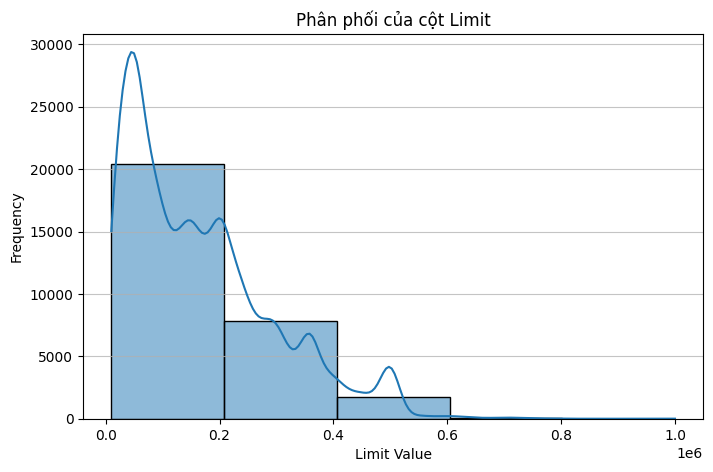

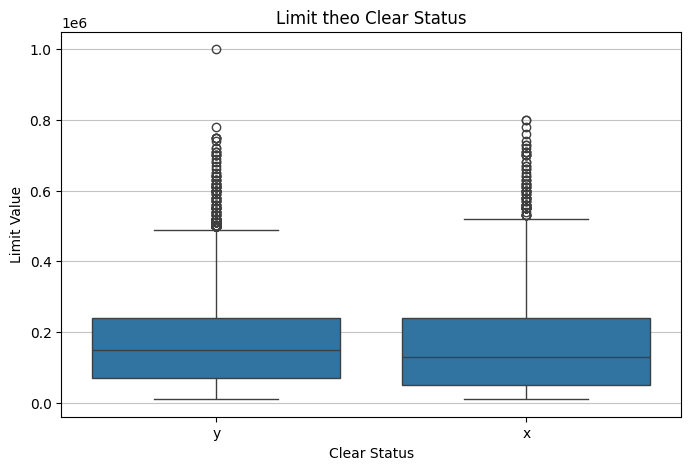

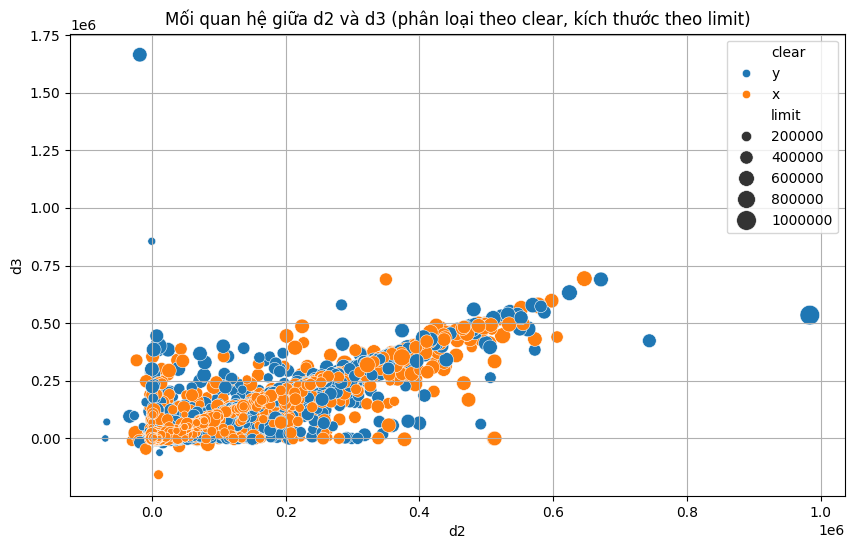

In [ ]:

# Trực quan hóa phân phối của cột 'limit'
plt.figure(figsize=(8, 5))
sns.histplot(df['limit'], kde=True, bins=5)
plt.title('Phân phối của cột Limit')
plt.xlabel('Limit Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Trực quan hóa mối quan hệ giữa 'clear' và 'limit'
plt.figure(figsize=(8, 5))
sns.boxplot(x='clear', y='limit', data=df)
plt.title('Limit theo Clear Status')
plt.xlabel('Clear Status')
plt.ylabel('Limit Value')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Biểu đồ phân tán giữa d2 và d3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='d2', y='d3', data=df, hue='clear', size='limit', sizes=(20, 200))
plt.title('Mối quan hệ giữa d2 và d3 (phân loại theo clear, kích thước theo limit)')
plt.xlabel('d2')
plt.ylabel('d3')
plt.grid(True)
plt.show()

In [ ]:



# Chọn các cột đặc trưng và biến mục tiêu
features = ['c1', 'd1', 'f1', 'c2', 'd2', 'f2', 'f3', 'f4', 'f5', 'f6']
target = 'limit'

# Tạo X (đặc trưng) và y (mục tiêu)
X = df[features]
y = df[target]

# Xử lý dữ liệu: Chuẩn hóa các đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập train và test (90% train, 10% test), giữ chỉ số
train_idx, test_idx = train_test_split(df.index, test_size=0.1, random_state=10)

# Tạo df_train và df_test dựa trên chỉ số
df_train = df.loc[train_idx]
df_test = df.loc[test_idx]

# Tạo X_train, X_test, y_train, y_test từ chỉ số
X_train = X_scaled[train_idx]
X_test = X_scaled[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

# Khởi tạo và huấn luyện mô hình Multiple Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#câu 4: Hãy cho biết giá trị R-Squared và MAE đạt được trên dữ liệu kiểm thử theo mô hình MLR
print(f"R-Squared trên tập test: {r2:.4f}")
print(f"Mean Absolute Error (MAE) trên tập test: {mae:.2f}")

# Dự báo giá trị limit cho các bộ giá trị [1, 2, 3, 4, 5]
new_data = np.array([[1, 2, 3, 4, 5, 0, 0, 0, 0, 0]])
new_data_scaled = scaler.transform(new_data)
new_pred = model.predict(new_data_scaled)

print(f"\nDự báo giá trị limit cho bộ giá trị [1, 2, 3, 4, 5]: {new_pred[0]:.2f}")

R-Squared trên tập test: 0.3004
Mean Absolute Error (MAE) trên tập test: 82906.85

Dự báo giá trị limit cho bộ giá trị [1, 2, 3, 4, 5]: -9482.74


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
#câu 2: số lượng mẫu của df_train và df_test
# Tính số lượng mẫu
print(f"\nSố lượng mẫu trong X_train (df_train): {len(X_train)}")
print(f"Số lượng mẫu trong X_test (df_test): {len(X_test)}")


Số lượng mẫu trong X_train (df_train): 27000
Số lượng mẫu trong X_test (df_test): 3000


In [ ]:
#câu 3: hãy cho biết những giá trị order nào tương ứng thuộc về df_train và df_test
# Lấy các giá trị order từ df_train và df_test
order_train = df_train['order'].tolist()
order_test = df_test['order'].tolist()

# Hiển thị kết quả
print(f"Các giá trị order trong df_train: {order_train}")
print(f"Các giá trị order trong df_test: {order_test}")

Các giá trị order trong df_train: [2664, 1392, 18817, 485, 26435, 19484, 19437, 17776, 8016, 25832, 998, 24310, 1233, 26884, 15356, 17698, 29967, 6339, 29543, 19762, 18095, 14850, 16289, 24785, 29846, 5181, 1431, 22053, 21151, 13478, 2029, 10291, 28014, 10270, 10454, 18702, 3905, 4480, 3777, 8537, 4884, 21735, 20305, 1709, 8662, 17261, 18573, 17549, 9702, 8406, 3124, 1907, 29418, 13959, 6042, 17036, 16418, 26890, 18551, 9921, 23665, 22861, 11490, 16751, 22135, 26885, 28742, 17436, 19112, 11054, 5838, 10447, 18461, 7276, 4947, 26283, 13813, 2886, 15627, 18855, 13893, 18349, 17196, 29404, 11141, 760, 17701, 20192, 23737, 27538, 26134, 14389, 10325, 13549, 27024, 17974, 6288, 18606, 10163, 9666, 3089, 4473, 5505, 20521, 2615, 22669, 11439, 18411, 16290, 17325, 20581, 9394, 10985, 13728, 13300, 18829, 20125, 18393, 1176, 716, 117, 5578, 6147, 16189, 15401, 5050, 16540, 12197, 16064, 8, 13729, 24035, 4459, 20394, 7485, 7257, 17691, 18480, 17914, 28892, 27921, 3774, 6319, 19290, 6204, 8557, 

In [ ]:
# Câu 5: Dự đoán giá trị limit với bộ hệ số [-1.0, 9640.0, 15134.0, -2.0, 7404.0, 0.0, 7002.0, 8167.0, 3996.0, 2000.0]
# Tạo DataFrame cho dữ liệu mới
new_data_df = pd.DataFrame(
    [[-1.0, 9640.0, 15134.0, -2.0, 7404.0, 0.0, 7002.0, 8167.0, 3996.0, 2000.0]],
    columns=features
)
# Chuẩn hóa dữ liệu mới
new_data_scaled = scaler.transform(new_data_df)

# Dự đoán giá trị limits
new_pred = model.predict(new_data_scaled)

# Hiển thị kết quả
print(f"\nGiá trị limit dự đoán với bộ hệ số [-1.0, 9640.0, 15134.0, -2.0, 7404.0, 0.0, 7002.0, 8167.0, 3996.0, 2000.0]: {new_pred[0]:.2f}")


Giá trị limit dự đoán với bộ hệ số [-1.0, 9640.0, 15134.0, -2.0, 7404.0, 0.0, 7002.0, 8167.0, 3996.0, 2000.0]: 213447.42


In [ ]:
# cau 6:
# Huấn luyện mô hình KNN với k=20
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Tách đặc trưng và nhãn
X_train_raw = df_train[['c1', 'd1', 'f1']]
y_train_knn = df_train['drop']

# 2. Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_raw)

# 3. Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_knn, y_train_knn)

# 4. Dự đoán lại để đánh giá trên tập huấn luyện
y_pred_knn = knn.predict(X_train_knn)

# 5. Tính độ chính xác
accuracy = accuracy_score(y_train_knn, y_pred_knn)
print("Độ chính xác sau khi scale dữ liệu:", accuracy)


Độ chính xác sau khi scale dữ liệu: 0.5408148148148149


In [ ]:
# câu 7:
# 4. Dự đoán xác suất trên chính tập huấn luyện
probs = knn.predict_proba(X_train_knn)  # mỗi hàng là [P(0), P(1)]

# 5. Trích xuất xác suất lớn nhất làm đặc trưng knn_feature
knn_feature = np.max(probs, axis=1)

print("Giá trị trung bình của đặc trưng knn_feature:", knn_feature.mean())


Giá trị trung bình của đặc trưng knn_feature: 0.5400537037037038


In [ ]:
#câu 8:
# Loại bỏ các hàng chứa giá trị thiếu (NaN)
X_train_clean = X_train_raw.dropna()
# Tính min, mean, var, max
min_values = X_train_clean.min()
mean_values = X_train_clean.mean()
var_values = X_train_clean.var()
max_values = X_train_clean.max()

# Hiển thị kết quả
print("Giá trị nhỏ nhất:\n", min_values)
print("\nGiá trị trung bình:\n", mean_values)
print("\nPhương sai:\n", var_values)
print("\nGiá trị lớn nhất:\n", max_values)
# print(df_train.describe())

Giá trị nhỏ nhất:
 c1        -2
d1   -165580
f1         0
dtype: int64

Giá trị trung bình:
 c1       -0.018037
d1    51168.963037
f1     5648.137222
dtype: float64

Phương sai:
 c1    1.263166e+00
d1    5.448956e+09
f1    2.758259e+08
dtype: float64

Giá trị lớn nhất:
 c1         8
d1    964511
f1    873552
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error

# Giả sử bạn đã có DataFrame df với các cột: c1, d1, f1, c2, d2, f2, f3, f4, f5, f6, drop, delete, limit

# Chuẩn bị dữ liệu cho từng mô hình
X_knn = df[['c1', 'd1', 'f1']]
y_knn = df['drop']      # Nhãn phân loại drop cho KNN

X_gnb = df[['c2', 'd2', 'f2']]
y_gnb = df['delete']    # Nhãn phân loại delete cho GNB

X_mlr_base = df[['f3', 'f4', 'f5', 'f6']]
y_mlr = df['limit']     # Biến mục tiêu hồi quy

# Tách train/test cho từng bộ dữ liệu
# KNN
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(
    X_knn, y_knn, test_size=0.1, random_state=10)

# GNB
X_gnb_train, X_gnb_test, y_gnb_train, y_gnb_test = train_test_split(
    X_gnb, y_gnb, test_size=0.1, random_state=10)

# MLR (sẽ dùng sau khi có đặc trưng từ KNN và GNB)
# Ở đây tạm chia theo chỉ số y_knn_train index vì sau này sẽ ghép đặc trưng

# Chuẩn hóa dữ liệu cho KNN
scaler_knn = StandardScaler()
X_knn_train_scaled = scaler_knn.fit_transform(X_knn_train)
X_knn_test_scaled = scaler_knn.transform(X_knn_test)

# KNN model với n_neighbors=20
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_knn_train_scaled, y_knn_train)
probs_knn_train = knn.predict_proba(X_knn_train_scaled)
probs_knn_test = knn.predict_proba(X_knn_test_scaled)

# GNB model
gnb = GaussianNB()
gnb.fit(X_gnb_train, y_gnb_train)
probs_gnb_train = gnb.predict_proba(X_gnb_train)
probs_gnb_test = gnb.predict_proba(X_gnb_test)

# Trích xuất đặc trưng: max xác suất dự đoán của mỗi mẫu
knn_feature_train = probs_knn_train.max(axis=1)
knn_feature_test = probs_knn_test.max(axis=1)
gnb_feature_train = probs_gnb_train.max(axis=1)
gnb_feature_test = probs_gnb_test.max(axis=1)

# Chuẩn bị tập dữ liệu MLR:
# Lấy dữ liệu f3, f4, f5, f6 tương ứng với index của tập train/test KNN (hoặc GNB)
# Cần đồng bộ index giữa các tập (ở đây ta giả sử các index khớp, hoặc cần xử lý riêng)
X_mlr_train = df.loc[X_knn_train.index, ['f3', 'f4', 'f5', 'f6']].copy()
X_mlr_test = df.loc[X_knn_test.index, ['f3', 'f4', 'f5', 'f6']].copy()

# Thêm đặc trưng knn_feature và gnb_feature
X_mlr_train['knn_feature'] = knn_feature_train
X_mlr_train['gnb_feature'] = gnb_feature_train

X_mlr_test['knn_feature'] = knn_feature_test
X_mlr_test['gnb_feature'] = gnb_feature_test

# Mục tiêu limit (hồi quy) lấy theo index tập train/test
y_mlr_train = y_mlr.loc[X_knn_train.index]
y_mlr_test = y_mlr.loc[X_knn_test.index]

# Huấn luyện mô hình hồi quy MLR với tập đặc trưng mở rộng
mlr = LinearRegression()
mlr.fit(X_mlr_train, y_mlr_train)
y_pred_mlr = mlr.predict(X_mlr_test)

# Đánh giá mô hình hồi quy
print("MLR:")
print(f"  R²: {r2_score(y_mlr_test, y_pred_mlr):.4f}")
print(f"  MAE: {mean_absolute_error(y_mlr_test, y_pred_mlr):.4f}")


MLR:
  R²: 0.1316
  MAE: 96176.0507


In [ ]:
#câu 10:
knn_features = ['c1', 'd1', 'f1']
knn_target = 'drop'
new_knn_proba = knn.predict_proba(new_data_df[knn_features])
new_data_df['knn_feature'] = np.max(new_knn_proba, axis=1)

gnb_features = ['c2', 'd2', 'f2']
gnb_target = 'delete'
# Tính toán max_predicted_probabilities_gnb cho đầu vào mới
new_gnb_proba = gnb.predict_proba(new_data_df[gnb_features])
new_data_df['gnb_feature'] = np.max(new_gnb_proba, axis=1)

mlr_new_features = ['f3', 'f4', 'f5', 'f6', 'knn_feature', 'gnb_feature']


X_new_input_for_mlr = new_data_df[mlr_new_features]
predicted_limit_new_mlr = mlr.predict(X_new_input_for_mlr)

print(f"\n--- Dự báo giá trị 'limit' bằng Mô hình MLR MỚI ---")
print(f"\nGiá trị dự báo của 'limit' theo mô hình MLR mới là: {predicted_limit_new_mlr[0]:.2f}")


--- Dự báo giá trị 'limit' bằng Mô hình MLR MỚI ---

Giá trị dự báo của 'limit' theo mô hình MLR mới là: 171373.84


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
